In [23]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [24]:
df = pd.read_csv('/content/Churn_Modelling (1) (1).csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [28]:
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

In [29]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
model = LabelEncoder()

In [31]:
df['Geography'] = model.fit_transform(df['Geography'])
df['Gender'] = model.fit_transform(df['Gender'])

In [32]:
x = df.drop('Exited', axis=1);
y = df['Exited']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [44]:
model = Sequential()
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7953 - loss: 0.5783
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7952 - loss: 0.4515
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8020 - loss: 0.4347
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7974 - loss: 0.4383
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 0.4475
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7962 - loss: 0.4496
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7939 - loss: 0.4429
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7951 - loss: 0.4452
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 0.4430
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7994 - loss: 0.4353
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7997 - loss: 0.4301
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

In [45]:
model.evaluate(x_test,y_test,batch_size=10)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4104


[0.41658255457878113, 0.7975000143051147]

In [47]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [49]:
acc = accuracy_score(y_test, y_pred)

In [50]:
acc

0.7975

In [51]:
import matplotlib as plt

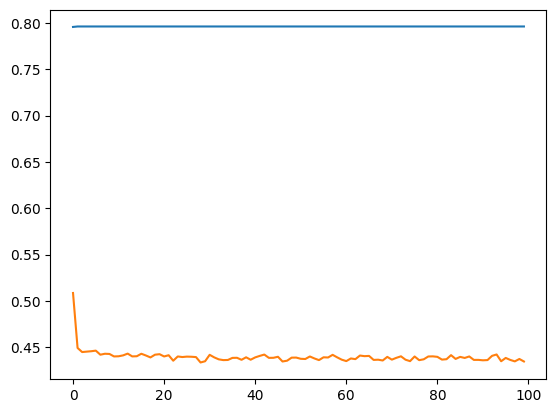

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()